In [1]:
import torch
import numpy as np
import matplotlib as mpl

print('LIB VERSION:\n')

print("{:10} | {:10} | {:10}".format('torch', 'numpy', 'matplotlib'))
print("{:10} | {:10} | {:10}".format(torch.__version__, np.__version__, mpl.__version__))

LIB VERSION:

torch      | numpy      | matplotlib
1.1.0a0+b457266 | 1.18.1     | 3.3.1     


In [2]:
print("PYTORCH INFO \nVERSION:{} , CUDA:{}".format(torch.__version__, torch.version.cuda))

PYTORCH INFO 
VERSION:1.1.0a0+b457266 , CUDA:10.0.117


In [3]:
# 宣告 Tensor
val_1 = torch.Tensor([[1,1],[1,1],[1,1]])

# 宣告一個維度 1 x 3 的矩陣，數值都為 0
val_2 = torch.zeros(1,3)     

# 宣告一個維度 1 x 3 的矩陣，數值為 0 ~ 1 之間亂數 
val_3 = torch.rand(1,3)    

# 宣告一個維度 1 x 5 的矩陣，數值為 高斯分佈 的亂數 
val_4 = torch.randn(1,5)

# 印出來
print("Example: \n\n{}\n\n{}\n\n{}\n\n{}".format(val_1, val_2, val_3, val_4))


Example: 

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

tensor([[0., 0., 0.]])

tensor([[0.8557, 0.0408, 0.1035]])

tensor([[ 2.2848, -0.6487,  0.2477, -0.7475, -0.7630]])


In [4]:
# 從 Numpy 轉換成 Tensor，從 Tensor 轉成 Numpy
numpy = np.array([2,2,2])
tensor = torch.tensor(numpy)
tensor2np = tensor.numpy()

print("Numpy: {} , {}\n".format(numpy, type(numpy)))
print("Np to Tensor: {} , {}\n".format(tensor, type(tensor)))
print("Tensor to Np: {} , {}\n".format(tensor2np,  type(tensor2np)))

Numpy: [2 2 2] , <class 'numpy.ndarray'>

Np to Tensor: tensor([2, 2, 2]) , <class 'torch.Tensor'>

Tensor to Np: [2 2 2] , <class 'numpy.ndarray'>



In [5]:
# 將 Tensor 丟進 GPU 訓練
tensor_gpu_1 = tensor.cuda()
tensor_gpu_2 = tensor.to('cuda')

# 將 Tensor 丟回 CPU 訓練
tensor_cpu_1 = tensor_gpu_1.cpu()
tensor_cpu_2 = tensor.to('cpu')

# 從 GPU 中取得 Tensor 並轉成 Numpy
np_from_gpu = tensor_gpu_1.cpu().numpy()

In [6]:
# 基本數學計算
x = torch.rand(1,6)
y = torch.rand(1,6)

print("{:5} = {}\n{:5} = {}\n".format('x', x, 'y', y))
print("{:5} = {} \n".format('x+y', x+y))
print("{:5} = {} \n".format('x-y', x-y))
print("{:5} = {} \n".format('x*y', x*y))
print("{:5} = {} \n".format('x/y', x/y))

x     = tensor([[0.9994, 0.5840, 0.5448, 0.1120, 0.5524, 0.5405]])
y     = tensor([[0.3429, 0.4261, 0.4365, 0.4284, 0.4242, 0.8264]])

x+y   = tensor([[1.3423, 1.0101, 0.9813, 0.5405, 0.9766, 1.3669]]) 

x-y   = tensor([[ 0.6566,  0.1580,  0.1083, -0.3164,  0.1282, -0.2859]]) 

x*y   = tensor([[0.3427, 0.2489, 0.2378, 0.0480, 0.2343, 0.4467]]) 

x/y   = tensor([[2.9150, 1.3707, 1.2480, 0.2615, 1.3021, 0.6540]]) 



In [7]:
cat_hor = torch.cat([x,y])        # 垂直合併
cat_ver = torch.cat([x,y], 1)     # 水平合併
x_reshape = x.view(2,3)           # 將 x 塑形成 (2,3)
y_reshape = y.view(6,1)           # 將 y 塑形成 (6,1)
y_reshape_2 = y.view(-1,2)        # 將 y 塑形成 (任意大小,2)

print("x shape    : {}\ny shape    : {}\n".format(x.size(), y.size()))

print("horizontal : {}".format(cat_hor.shape))
print("vertical   : {}\n".format(cat_ver.shape))

print("x reshape  : {}".format(x_reshape.shape))
print("y reshape  : {}".format(y_reshape.shape))
print("y reshape2 : {}\n".format(y_reshape_2.shape))

x shape    : torch.Size([1, 6])
y shape    : torch.Size([1, 6])

horizontal : torch.Size([2, 6])
vertical   : torch.Size([1, 12])

x reshape  : torch.Size([2, 3])
y reshape  : torch.Size([6, 1])
y reshape2 : torch.Size([3, 2])



In [8]:
a = torch.rand(2,5)                # 宣告一個維度 2 x 5 的張量
a_max = torch.max(a)               # 尋找其張量最大數值
a_sum_hor = torch.sum(a, dim=1)    # 水平維度做相加
a_sum_ver = torch.sum(a, dim=0)    # 垂直維度做相加
a_mean = torch.mean(a)             # 取平均值
a_norm = torch.norm(a)             # 求範數。預設是 L2，公式為「平方合開根號」

print("{} : \n{}\n".format('a' , a))
print("{:15} : {}".format('[1] a shape' , a.size()))
print("{:15} : {}".format('[2] find max' , a_max))
print("{:15} : {}".format('[3] sum dim=0' , a_sum_ver))
print("{:15} : {}".format('[4] sum dim=1' , a_sum_hor))
print("{:15} : {}".format('[5] get mean' , a_mean))
print("{:15} : {}".format('[6] L2  norm' , a_norm))


a : 
tensor([[0.2961, 0.1200, 0.1098, 0.4314, 0.0291],
        [0.3435, 0.2825, 0.6572, 0.5949, 0.1462]])

[1] a shape     : torch.Size([2, 5])
[2] find max    : 0.6571745872497559
[3] sum dim=0   : tensor([0.6396, 0.4024, 0.7670, 1.0262, 0.1753])
[4] sum dim=1   : tensor([0.9864, 2.0242])
[5] get mean    : 0.30106237530708313
[6] L2  norm    : 1.1427818536758423


In [9]:
a = torch.tensor(3.)  # 記得張量必須是float
a_grad = torch.tensor(3., requires_grad=True)
a_no_grad = torch.tensor(3., requires_grad=False)

print(a)
print(a_grad)
print(a_no_grad)

tensor(3.)
tensor(3., requires_grad=True)
tensor(3.)


In [10]:
import torch 

x = torch.tensor(5., requires_grad = True)

y = 10*x + 5

y.backward()

print(x.grad)

tensor(10.)


In [11]:
import torch 

def func(a):
    w1 = torch.tensor(3., requires_grad = True)
    w2 = torch.tensor(3., requires_grad = True)
    w3 = torch.tensor(3., requires_grad = True)
    w4 = torch.tensor(3., requires_grad = True)

    b = w1*a 
    c = w2*a
    d = w3*b + w4*c 
    L = (10 - d)
    
    true_bp = -1 * (w1*w3*1 + w2*w4*1)
    
    return L, true_bp

a = torch.tensor(5., requires_grad = True)

L, true_backward = func(a)
L.backward()
print('PyTorch計算的BP : {}\n實際上的BP : {}'.format(a.grad, true_backward))

PyTorch計算的BP : -18.0
實際上的BP : -18.0


torch.Size([20, 1]) torch.Size([20, 1])


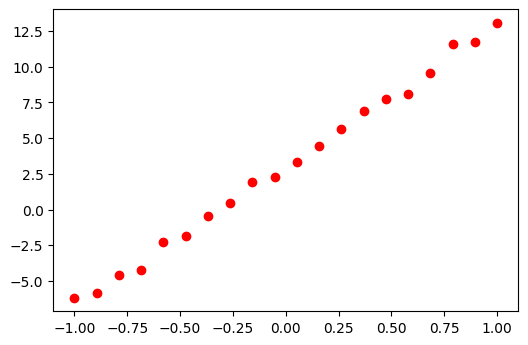

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

''' 設定好 輸入、權重、輸出 '''
x = torch.unsqueeze(torch.linspace(-1, 1, 20), 1)    # 設定 10個點介於 -1~1 之間並將維度增加 [10] -> [10,1]
w = torch.tensor([10.])         # 固定 w 為 ground truth
b = torch.tensor([3.])          # 固定 b 為 ground truth
y = w * x + b + torch.randn(x.shape)*0.4             # 簡單的線性方程，取得 10 個點的 y 座標 再加上一點雜訊

print(x.shape, y.shape)

''' 畫圖 '''
plt.figure(dpi=100)    # 宣告一個圖片 dpi 設為 100
plt.scatter(x, y, color= 'r')    # 將正確答案先畫出來標示為紅色
plt.show()

[00/50] loss:53.501 	 w_:tensor([1.3916]) 	 b_:tensor([-0.7670])
[10/50] loss:6.966 	 w_:tensor([5.8930]) 	 b_:tensor([2.6551])
[20/50] loss:1.548 	 w_:tensor([7.9869]) 	 b_:tensor([3.0226])
[30/50] loss:0.429 	 w_:tensor([8.9608]) 	 b_:tensor([3.0621])
[40/50] loss:0.188 	 w_:tensor([9.4139]) 	 b_:tensor([3.0663])
[50/50] loss:0.136 	 w_:tensor([9.6246]) 	 b_:tensor([3.0667])


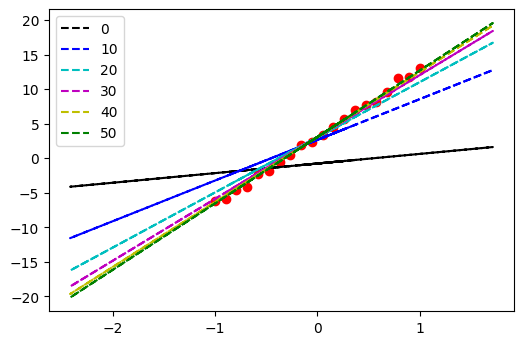

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt

''' 畫圖 '''
plt.figure(dpi=100)    # 宣告一個圖片 dpi 設為 100
plt.scatter(x, y, color= 'r')    # 將正確答案先畫出來標示為紅色
attributes = ['--k','--b','--c','--m','--y','--g', '--r']    # 顏色線條參數

''' 初始化參數 '''
x_ = torch.randn(10,1)                     # 宣告一組新的 x_ 等等來拿預測用
w_ = torch.randn(1, requires_grad=True)    # 隨機產生 w_ 讓神經網路訓練，目的是找到正確的數值
b_ = torch.randn(1, requires_grad=True)    # 隨機產生 b_ 讓神經網路訓練，目的是找到正確的數值

epochs = 50                                # 總共跑 N 次迭代
log_time = epochs/5                        # 總共會記錄 5 次 loss 
lr = 0.1                                   # lr 是學習率

for i in range(epochs + 1):
    
    y_ = x * w_ + b_                    # 利用 w_ 計算新的 y_

    loss = ((y - y_)**2).mean()    # 利用 Mean Suqre Error 計算 Loss
    
    loss.backward()                # 丟進反向傳遞獲得梯度
    
    with torch.no_grad():          # 避免計算圖追蹤導數，也可以減少運算量
        
        w_ -= lr * w_.grad         # 更新權重值
        b_ -= lr * b_.grad
        
        w_.grad.zero_()            # 清空梯度，也是避免重複計算
        b_.grad.zero_()
        
        if(i%log_time==0):                # 每 5 次 印出 loss 跟 w_ 的狀況
            
            print('[{:>02}/{}] loss:{:5.3f} \t w_:{} \t b_:{}'.format(i,epochs,
                                                               loss.data,
                                                               w_.data,
                                                               b_.data))    # {:5.3f} 總寬度 5 小數點後 3 位
            
            plt.plot(x_.detach().numpy(), (x_* w_ + b_).detach().numpy() , attributes[int(i/log_time)], label=str(i))    # 畫出曲線

plt.legend(loc='best')    # 自動調整最佳位置
plt.show()

# 動畫

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

''' gif 用'''
fig = plt.figure(dpi=150)    # 宣告一個圖片 dpi 設為 100
plt.scatter(x, y, color= 'r')    # 將正確答案先畫出來標示為紅色
attributes = ['--k','--b','--c','--m','--y','--g', '--r']    # 顏色線條參數
imgs=[]

''' 初始化參數 '''
x_ = torch.unsqueeze(torch.linspace(-1,1,10), 1)         # 宣告一組新的 x_ 等等來拿預測用
w_ = torch.randn(1, requires_grad=True)    # 隨機產生 w_ 讓神經網路訓練，目的是找到正確的數值
b_ = torch.randn(1, requires_grad=True)    # 隨機產生 b_ 讓神經網路訓練，目的是找到正確的數值

epochs = 50                                # 總共跑 N 次迭代
log_time = epochs/50                       # 總共會記錄 5 次 loss 
lr = 0.1                                   # lr 是學習率

for i in range(epochs + 1):
    
    y_ = x * w_ + b_                    # 利用 w_ 計算新的 y_

    loss = ((y - y_)**2).mean()    # 利用 Mean Suqre Error 計算 Loss
    
    loss.backward()                # 丟進反向傳遞獲得梯度
    
    with torch.no_grad():          # 避免計算圖追蹤導數，也可以減少運算量
        
        w_ -= lr * w_.grad         # 更新權重值
        b_ -= lr * b_.grad
        
        w_.grad.zero_()            # 清空梯度，也是避免重複計算
        b_.grad.zero_()
        
        if(i%log_time==0):                # 每 5 次 印出 loss 跟 w_ 的狀況
            
            print('[{:>02}/{}] loss:{:5.3f} \t w_:{} \t b_:{}'.format(i,epochs,
                                                               loss.data,
                                                               w_.data,
                                                               b_.data))    # {:5.3f} 總寬度 5 小數點後 3 位
            ''' 畫圖 '''
            data = plt.plot(x_.detach().numpy(), (x_ * w_ + b_).detach().numpy() , attributes[1])    # 畫出曲線
            imgs.append(data)

ani = animation.ArtistAnimation(fig, imgs, interval=10, blit=True,
                                repeat_delay=1000)

ani.save("linear_regression_example.gif",writer='pillow')

[00/50] loss:40.134 	 w_:tensor([1.0915]) 	 b_:tensor([0.8917])
[01/50] loss:32.843 	 w_:tensor([1.7337]) 	 b_:tensor([1.3268])
[02/50] loss:27.167 	 w_:tensor([2.3287]) 	 b_:tensor([1.6748])
[03/50] loss:22.668 	 w_:tensor([2.8798]) 	 b_:tensor([1.9532])
[04/50] loss:19.045 	 w_:tensor([3.3903]) 	 b_:tensor([2.1759])
[05/50] loss:16.089 	 w_:tensor([3.8631]) 	 b_:tensor([2.3541])
[06/50] loss:13.649 	 w_:tensor([4.3012]) 	 b_:tensor([2.4966])
[07/50] loss:11.618 	 w_:tensor([4.7069]) 	 b_:tensor([2.6107])
[08/50] loss:9.915 	 w_:tensor([5.0828]) 	 b_:tensor([2.7019])
[09/50] loss:8.480 	 w_:tensor([5.4309]) 	 b_:tensor([2.7749])
[10/50] loss:7.264 	 w_:tensor([5.7534]) 	 b_:tensor([2.8333])
[11/50] loss:6.232 	 w_:tensor([6.0522]) 	 b_:tensor([2.8800])
[12/50] loss:5.353 	 w_:tensor([6.3289]) 	 b_:tensor([2.9173])
[13/50] loss:4.603 	 w_:tensor([6.5853]) 	 b_:tensor([2.9472])
[14/50] loss:3.962 	 w_:tensor([6.8227]) 	 b_:tensor([2.9711])
[15/50] loss:3.413 	 w_:tensor([7.0427]) 	 b_:t